# **NBA Player Analysis**
Created by Amaran Kandiar,
Nick Almy,
Vaibhav Bhaksar,
Vivek Lalgondar

###**Data**
Data was collected from [NBAStuffer.com](https://www.nbastuffer.com/2023-2024-nba-player-stats/)

2023-24 NBA Regular Season player statistics

Each data entry represents an NBA Player and contains the following statistics:

| Field    | Statistic | Definition |
| -------- | ------- | ------------------ |
| Name     |Player Name| Name of the player |
| Team | Team Name     | Name of the current team the player plays for |
| Age    | Player Age    | Age of the player |
| GP    | Games Played    | How many games did the player appear in |
| MPG    | Minutes Per Game    | Time player is on the court in a game, measured in minutes |
| USG%    | Usage Rate | Estimate of the percentage of team plays used by a player while he was on the floor   |
| TO%    | Turnover Percentage    | Estimate of turnovers per 100 plays |
| FTA    | Free Throw Attempts    | Total Free Throw Attempts for the season |
| FT%    | Free Throw Percentage    | The player's shooting percentage from the free throw line |
| 2PA    | 2 Point Attempts    | Total 2 Point shot attempts for the season |
| 2P%    | 2 Point Percentage    | The player's shooting percentage for 2 point shots |
| 3PA    | 3 Point Attempts    | Total 3 Point shot attempts for the season |
| 3P%    | 3 Point Percentage    |  The player's shooting percentage for 3 point shots |
| eFG%    | Effective Field Goal Percentage    | Value adjusted shooting percentage, three-point shots made are worth 50% more than two-point shots made |
| TS%    | True Shooting Percentage    | Measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws |
| PPG    | Points Per Game    | The average number of points scored per game by the player |
| RPG    | Rebounds Per Game    | The average number of points scored per game by the player |
| ASP    | Assists Per Game    |The average number of assists per game by the player |
| SPG    | Steals Per Game    |The average number of steals per game by the player |
| BPG    | Blocks Per Game    |The average number of shots blocked per game by the player |
| TPG    | Turnovers Per Game    |The average number of turnovers caused per game by the player |
| VI    | Versatility Index    | Metric that measures a player's ability to produce in points, assists, and rebounds |
| ORtg    | Offensive Rating    | Estimates the number of points produced (including assists) by a player per 100 offensive possessions |
| DRtg    | Defensive Rating    | Estimates the number of points allowed (including blocks, steals) by a player per 100 defensive possessions |


###Initialization
(Run at least the first cell in this block before beginning!!)


In [ ]:
!pip install pandas matplotlib dash numpy seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 15.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'NBA Stats 202324 All Stats  NBA Player Props Tool.csv'
data = pd.read_csv(file_path)


## **Single Player Radar Dashboard**

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('NBA Stats 202324 All Stats  NBA Player Props Tool.csv')

# Calculate '3PM' by multiplying '3P%' by '3PA'
df['3PM'] = df['3P%'] * df['3PA']

# Normalize function
def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': i, 'value': i} for i in df['NAME'].unique()],
        value='Joel Embiid'
    ),
    dcc.Graph(id='player-radar-chart'),
    html.Div(id='radar-area')
])

# Callback to update radar chart and area text
@app.callback(
    [Output('player-radar-chart', 'figure'),
     Output('radar-area', 'children')],
    [Input('player-dropdown', 'value')]
)
def update_chart(selected_player):
    player_data = df[df['NAME'] == selected_player]
    labels = ['PPG', 'TS%', 'ORtg', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']
    stats = [
        normalize(player_data['PPG'].values[0], df['PPG'].min(), df['PPG'].max()),
        normalize(player_data['TS%'].values[0], df['TS%'].min(), df['TS%'].max()),
        normalize(player_data['ORtg'].values[0], df['ORtg'].min(), df['ORtg'].max()),
        normalize(player_data['3PM'].values[0], df['3PM'].min(), df['3PM'].max()),
        normalize(player_data['APG'].values[0], df['APG'].min(), df['APG'].max()),
        normalize(player_data['VI'].values[0], df['VI'].min(), df['VI'].max()),
        normalize(player_data['SPG'].values[0], df['SPG'].min(), df['SPG'].max()),
        normalize(player_data['DRtg'].values[0], df['DRtg'].min(), df['DRtg'].max()),
        normalize(player_data['BPG'].values[0], df['BPG'].min(), df['BPG'].max()),
        normalize(player_data['RPG'].values[0], df['RPG'].min(), df['RPG'].max())
    ]
    stats += stats[:1]
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig = go.Figure(data=go.Scatterpolar(
        r=stats,
        theta=labels,
        fill='toself'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=False
    )

    # Calculate the area of the radar chart
    def polygon_area(corners):
        n = len(corners)  # Number of points
        area = 0.0
        for i in range(n):
            j = (i + 1) % n
            area += corners[i][0] * corners[j][1]
            area -= corners[j][0] * corners[i][1]
        area = abs(area) / 2.0
        return area

    corners = [(stats[i] * np.cos(angle), stats[i] * np.sin(angle)) for i, angle in enumerate(angles[:-1])]
    area = polygon_area(corners)
    area_text = f"Area of radar chart for {selected_player}: {area:.2f}"

    return fig, area_text

# Run the app inside Jupyter
app.run_server(mode='inline')


<IPython.core.display.Javascript object>

## **Comparison Dashboards**

### **Player Comparison**


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('NBA Stats 202324 All Stats  NBA Player Props Tool.csv')

# Calculate '3PM' by multiplying '3P%' by '3PA'
df['3PM'] = df['3P%'] * df['3PA']

# Normalize function
def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

#make Stats list
def stats_list(player_data):
    stats = [
        normalize(player_data['PPG'].values[0], df['PPG'].min(), df['PPG'].max()),
        normalize(player_data['TS%'].values[0], df['TS%'].min(), df['TS%'].max()),
        normalize(player_data['ORtg'].values[0], df['ORtg'].min(), df['ORtg'].max()),
        normalize(player_data['3PM'].values[0], df['3PM'].min(), df['3PM'].max()),
        normalize(player_data['APG'].values[0], df['APG'].min(), df['APG'].max()),
        normalize(player_data['VI'].values[0], df['VI'].min(), df['VI'].max()),
        normalize(player_data['SPG'].values[0], df['SPG'].min(), df['SPG'].max()),
        normalize(player_data['DRtg'].values[0], df['DRtg'].max(), df['DRtg'].min()),
        normalize(player_data['BPG'].values[0], df['BPG'].min(), df['BPG'].max()),
        normalize(player_data['RPG'].values[0], df['RPG'].min(), df['RPG'].max())
    ]
    return stats

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': i, 'value': i} for i in df['NAME'].unique()],
        value='Joel Embiid'
    ),
    html.Div(id='additional-player-dropdown', children=[
        dcc.Dropdown(
            id='second-player-dropdown',
            options=[{'label': i, 'value': i} for i in df['NAME'].unique()],
            value='LeBron James',

        )
    ], style={'display': 'none'}),
    html.Button('Add Player', id='add-player-button', n_clicks=0),
    dcc.Graph(id='player-radar-chart'),
    html.Div(id='radar-area')
])

@app.callback(
    Output('additional-player-dropdown', 'style'),
    Input('add-player-button', 'n_clicks')
)
def display_second_dropdown(n_clicks):
    if n_clicks > 0:
        return {'display': 'block'}  # Make the div visible
    return {'display': 'none'}  # Keep the div hidden initiall

# Callback to update radar chart and area text
@app.callback(
    [Output('player-radar-chart', 'figure'),
     Output('radar-area', 'children')],
    [Input('player-dropdown', 'value'),
     Input('second-player-dropdown', 'value'),
     Input('add-player-button', 'n_clicks')]
)
def update_chart(selected_player, second_player, n_clicks):
    player_data = df[df['NAME'] == selected_player]
    labels = ['PPG', 'TS%', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']
    stats = stats_list(player_data)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig = go.Figure(data=go.Scatterpolar(
        r=stats,
        theta=labels,
        fill='toself',
        name=selected_player
    ))

    if n_clicks > 0 and second_player:
        stats_second_player = stats_list(df[df['NAME'] == second_player])
        fig.add_trace(go.Scatterpolar(
            r=stats_second_player,
            theta=labels,
            fill='toself',
            name=second_player
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=False
    )

    # Calculate the area of the radar chart
    def polygon_area(corners):
        n = len(corners)  # Number of points
        area = 0.0
        for i in range(n):
            j = (i + 1) % n
            area += corners[i][0] * corners[j][1]
            area -= corners[j][0] * corners[i][1]
        area = abs(area) / 2.0
        return area

    corners = [(stats[i] * np.cos(angle), stats[i] * np.sin(angle)) for i, angle in enumerate(angles[:-1])]
    area = polygon_area(corners)
    area_text = f"Area of radar chart for {selected_player}: {area:.2f}"

    return fig, area_text

# Run the app inside Jupyter
app.run_server(mode='inline')


<IPython.core.display.Javascript object>

### **Team Comparison**

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import numpy as np


nba_data = pd.read_csv('NBA Stats 202324 All Stats  NBA Player Props Tool.csv')
nba_data = nba_data.loc[nba_data['MPG'] >= 5]
nba_data['3PM'] = nba_data['3P%'] * nba_data['3PA']
team_averages = nba_data.copy().groupby('TEAM')[['PPG', 'TS%', 'ORtg', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']].mean()
team_averages = team_averages.reset_index()
league_average = nba_data[['PPG', 'TS%', 'ORtg', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']].mean()
league_average['TEAM'] = 'League Average'
team_averages.loc[len(team_averages.index)] = league_average
team_averages['NAME'] = team_averages['TEAM']



# Normalize function
def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

#make Stats list
def stats_list(player_data):
    stats = [
        normalize(player_data['PPG'].values[0], team_averages['PPG'].min(), team_averages['PPG'].max()),
        normalize(player_data['TS%'].values[0], team_averages['TS%'].min(), team_averages['TS%'].max()),
        normalize(player_data['ORtg'].values[0], team_averages['ORtg'].min(), team_averages['ORtg'].max()),
        normalize(player_data['3PM'].values[0], team_averages['3PM'].min(), team_averages['3PM'].max()),
        normalize(player_data['APG'].values[0], team_averages['APG'].min(), team_averages['APG'].max()),
        normalize(player_data['VI'].values[0], team_averages['VI'].min(), team_averages['VI'].max()),
        normalize(player_data['SPG'].values[0], team_averages['SPG'].min(), team_averages['SPG'].max()),
        normalize(player_data['DRtg'].values[0], team_averages['DRtg'].max(), team_averages['DRtg'].min()),
        normalize(player_data['BPG'].values[0], team_averages['BPG'].min(), team_averages['BPG'].max()),
        normalize(player_data['RPG'].values[0], team_averages['RPG'].min(), team_averages['RPG'].max())
    ]
    return stats

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': i, 'value': i} for i in team_averages['NAME'].unique()],
        value='Atl'
    ),
    html.Div(id='additional-player-dropdown', children=[
        dcc.Dropdown(
            id='second-player-dropdown',
            options=[{'label': i, 'value': i} for i in team_averages['NAME'].unique()],
            value='Bos',

        )
    ], style={'display': 'none'}),
    html.Button('Add Team', id='add-player-button', n_clicks=0),
    dcc.Graph(id='player-radar-chart'),
    html.Div(id='radar-area')
])

@app.callback(
    Output('additional-player-dropdown', 'style'),
    Input('add-player-button', 'n_clicks')
)
def display_second_dropdown(n_clicks):
    if n_clicks > 0:
        return {'display': 'block'}  # Make the div visible
    return {'display': 'none'}  # Keep the div hidden initiall

# Callback to update radar chart and area text
@app.callback(
    [Output('player-radar-chart', 'figure'),
     Output('radar-area', 'children')],
    [Input('player-dropdown', 'value'),
     Input('second-player-dropdown', 'value'),
     Input('add-player-button', 'n_clicks')]
)
def update_chart(selected_player, second_player, n_clicks):
    player_data = team_averages[team_averages['NAME'] == selected_player]
    labels = ['PPG', 'TS%', 'ORtg', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']
    stats = stats_list(player_data)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig = go.Figure(data=go.Scatterpolar(
        r=stats,
        theta=labels,
        fill='toself',
        name=selected_player
    ))

    if n_clicks > 0 and second_player:
        stats_second_player = stats_list(team_averages[team_averages['NAME'] == second_player])
        fig.add_trace(go.Scatterpolar(
            r=stats_second_player,
            theta=labels,
            fill='toself',
            name=second_player
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=False
    )

    # Calculate the area of the radar chart
    def polygon_area(corners):
        n = len(corners)  # Number of points
        area = 0.0
        for i in range(n):
            j = (i + 1) % n
            area += corners[i][0] * corners[j][1]
            area -= corners[j][0] * corners[i][1]
        area = abs(area) / 2.0
        return area

    corners = [(stats[i] * np.cos(angle), stats[i] * np.sin(angle)) for i, angle in enumerate(angles[:-1])]
    area = polygon_area(corners)
    area_text = f"Area of radar chart for {selected_player}: {area:.2f}"

    return fig, area_text

# Run the app inside Jupyter
app.run_server(mode='inline')



<IPython.core.display.Javascript object>

### **Team and Player Combined**


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import numpy as np


nba_data = pd.read_csv('NBA Stats 202324 All Stats  NBA Player Props Tool.csv')
nba_data = nba_data.loc[nba_data['MPG'] >= 10]
nba_data['3PM'] = nba_data['3P%'] * nba_data['3PA']
team_averages = nba_data.copy().groupby('TEAM')[['PPG', 'TS%', 'ORtg', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']].mean()
team_averages = team_averages.reset_index()
league_average = nba_data[['PPG', 'TS%', 'ORtg', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']].mean()
league_average['TEAM'] = 'League Average'
team_averages.loc[len(team_averages.index)] = league_average
team_averages['NAME'] = team_averages['TEAM']
team_averages = pd.concat([nba_data, team_averages], ignore_index=True)


# Normalize function
def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

#make Stats list
def stats_list(player_data):
    stats = [
        normalize(player_data['PPG'].values[0], team_averages['PPG'].min(), team_averages['PPG'].max()),
        normalize(player_data['TS%'].values[0], team_averages['TS%'].min(), team_averages['TS%'].max()),
        normalize(player_data['ORtg'].values[0], team_averages['ORtg'].min(), team_averages['ORtg'].max()),
        normalize(player_data['3PM'].values[0], team_averages['3PM'].min(), team_averages['3PM'].max()),
        normalize(player_data['APG'].values[0], team_averages['APG'].min(), team_averages['APG'].max()),
        normalize(player_data['VI'].values[0], team_averages['VI'].min(), team_averages['VI'].max()),
        normalize(player_data['SPG'].values[0], team_averages['SPG'].min(), team_averages['SPG'].max()),
        normalize(player_data['DRtg'].values[0], team_averages['DRtg'].max(), team_averages['DRtg'].min()),
        normalize(player_data['BPG'].values[0], team_averages['BPG'].min(), team_averages['BPG'].max()),
        normalize(player_data['RPG'].values[0], team_averages['RPG'].min(), team_averages['RPG'].max())
    ]
    return stats

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': i, 'value': i} for i in team_averages['NAME'].unique()],
        value='Atl'
    ),
    html.Div(id='additional-player-dropdown', children=[
        dcc.Dropdown(
            id='second-player-dropdown',
            options=[{'label': i, 'value': i} for i in team_averages['NAME'].unique()],
            value='Bos',

        )
    ], style={'display': 'none'}),
    html.Button('Add Team', id='add-player-button', n_clicks=0),
    dcc.Graph(id='player-radar-chart'),
    html.Div(id='radar-area')
])

@app.callback(
    Output('additional-player-dropdown', 'style'),
    Input('add-player-button', 'n_clicks')
)
def display_second_dropdown(n_clicks):
    if n_clicks > 0:
        return {'display': 'block'}  # Make the div visible
    return {'display': 'none'}  # Keep the div hidden initiall

# Callback to update radar chart and area text
@app.callback(
    [Output('player-radar-chart', 'figure'),
     Output('radar-area', 'children')],
    [Input('player-dropdown', 'value'),
     Input('second-player-dropdown', 'value'),
     Input('add-player-button', 'n_clicks')]
)
def update_chart(selected_player, second_player, n_clicks):
    player_data = team_averages[team_averages['NAME'] == selected_player]
    labels = ['PPG', 'TS%', 'ORtg', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']
    stats = stats_list(player_data)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig = go.Figure(data=go.Scatterpolar(
        r=stats,
        theta=labels,
        fill='toself',
        name=selected_player
    ))

    if n_clicks > 0 and second_player:
        stats_second_player = stats_list(team_averages[team_averages['NAME'] == second_player])
        fig.add_trace(go.Scatterpolar(
            r=stats_second_player,
            theta=labels,
            fill='toself',
            name=second_player
        ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=False
    )

    # Calculate the area of the radar chart
    def polygon_area(corners):
        n = len(corners)  # Number of points
        area = 0.0
        for i in range(n):
            j = (i + 1) % n
            area += corners[i][0] * corners[j][1]
            area -= corners[j][0] * corners[i][1]
        area = abs(area) / 2.0
        return area

    corners = [(stats[i] * np.cos(angle), stats[i] * np.sin(angle)) for i, angle in enumerate(angles[:-1])]
    area = polygon_area(corners)
    area_text = f"Area of radar chart for {selected_player}: {area:.2f}"

    return fig, area_text

# Run the app inside Jupyter
app.run_server(mode='inline')



<IPython.core.display.Javascript object>

### **Role Player Analysis**

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('NBA Stats 202324 All Stats  NBA Player Props Tool.csv')

# Calculate '3PM' by multiplying '3P%' by '3PA'
df['3PM'] = df['3P%'] * df['3PA']

# Normalize function
def normalize(data, min_val, max_val):
    return (data - min_val) / (max_val - min_val)

# Normalize the relevant statistics
statistics = ['PPG', 'TS%', 'ORtg', '3PM', 'APG', 'VI', 'SPG', 'DRtg', 'BPG', 'RPG']
for stat in statistics:
    df[stat] = normalize(df[stat], df[stat].min(), df[stat].max())

# Calculate the composite score and variability index
df['Composite Score'] = df[statistics].mean(axis=1)
df['Variability Index'] = df[statistics].std(axis=1)  # Standard deviation to identify role players

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Dropdown(
        id='player-dropdown',
        options=[{'label': i, 'value': i} for i in df['NAME'].unique()],
        value='LeBron James'  # Default value
    ),
    dcc.Graph(id='player-radar-chart')
])

# Callback to update radar chart based on player selection
@app.callback(
    Output('player-radar-chart', 'figure'),
    [Input('player-dropdown', 'value')]
)
def update_chart(selected_player):
    player_data = df[df['NAME'] == selected_player]
    labels = statistics
    stats = player_data.iloc[0][labels].values.tolist()
    stats += stats[:1]  # Close the radar chart

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    composite_score = player_data['Composite Score'].values[0]
    std_dev = player_data['Variability Index'].values[0]

    fig = go.Figure(data=go.Scatterpolar(
        r=stats,
        theta=labels,
        fill='toself',
        line=dict(color='blue')  # Default line color for stats
    ))

    # Highlight stats with colored lines
    for i, stat in enumerate(stats[:-1]):
        if stat > composite_score + 0.5 * std_dev:
            fig.add_trace(go.Scatterpolar(
                r=[0, stat],
                theta=[labels[i], labels[i]],
                mode='lines',
                line=dict(color='green', width=2)  # Green for above average
            ))
        elif stat < composite_score - 0.5 * std_dev:
            fig.add_trace(go.Scatterpolar(
                r=[0, stat],
                theta=[labels[i], labels[i]],
                mode='lines',
                line=dict(color='red', width=2)  # Red for below average
            ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        showlegend=False
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

### **Analysis of Player Statistics Correlations**

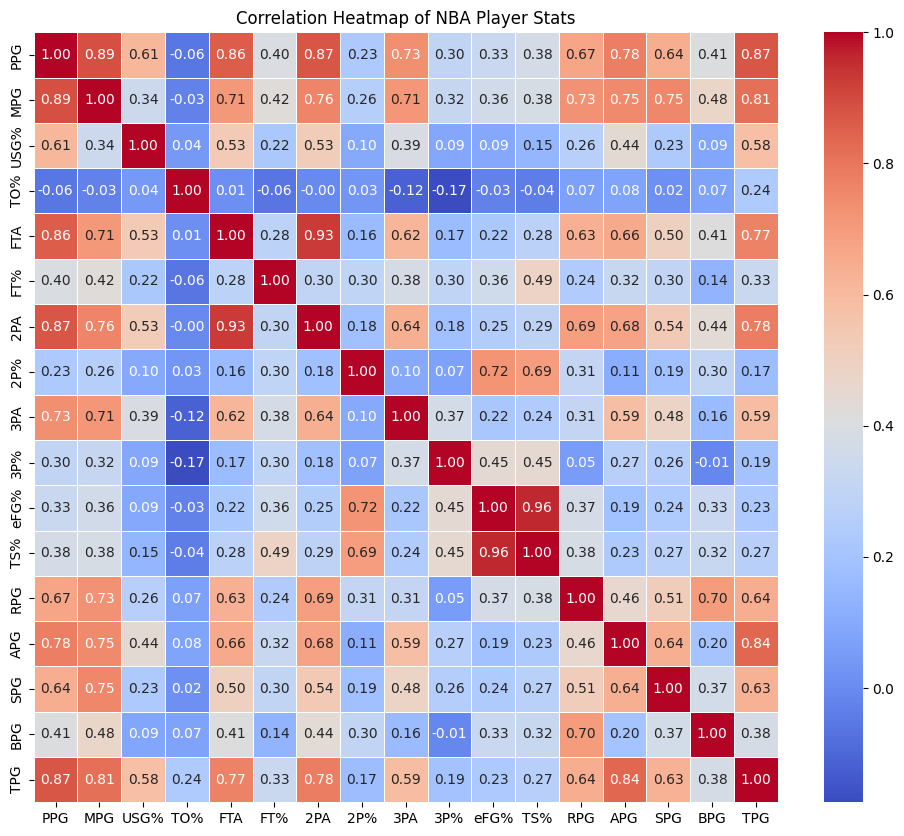

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the heatmap
columns_to_include = [
    'PPG', 'MPG', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%',
    'eFG%', 'TS%', 'RPG', 'APG', 'SPG', 'BPG', 'TPG'
]

# Create a subset of the data with the selected columns
nba_subset = data[columns_to_include]

# Calculate the correlation matrix
correlation_matrix = nba_subset.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of NBA Player Stats')
plt.show()